In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
df['ID'].nunique()

5000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- There are no null values
- shape is 5000 x 14
- except CCAvg, all are int data type. CCAvg id float

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- min of Experience is negative value. it should be fixed
- We can observe many categorical value
- Mortgage is skewed


In [8]:
df.nunique() #gives unique value in each column

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

- ID has 5000 unique values which does not add any further information to data
- Family has only 4 values. So it is a categorical variable
- Education has only 3 values. So it can vbe considered as a categorical variable
- Personal Loan  Securities Account CD Account,Online, CreditCard has only 2 different values. So these can be considered as a categorical variable

In [9]:
df['Mortgage'].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

- Mortgage has 3462 zero value

In [10]:
df_edit=df.drop('ID',axis=1)
df_edit.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
df_edit['Experience']=np.abs(df_edit['Experience']) # removed negative value

In [12]:
df_edit.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [13]:
for i in ['Family','Education', 'Personal Loan','Securities Account','CD Account','Online','CreditCard']:
   
    print(df_edit[i].value_counts(normalize=True))

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64
1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64
0    0.904
1    0.096
Name: Personal Loan, dtype: float64
0    0.8956
1    0.1044
Name: Securities Account, dtype: float64
0    0.9396
1    0.0604
Name: CD Account, dtype: float64
1    0.5968
0    0.4032
Name: Online, dtype: float64
0    0.706
1    0.294
Name: CreditCard, dtype: float64


- 3530 people haszero credit card spending per month
- Above, we can observe value counts of categorical variables

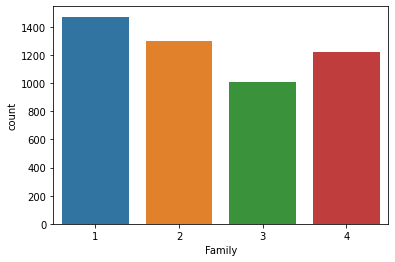

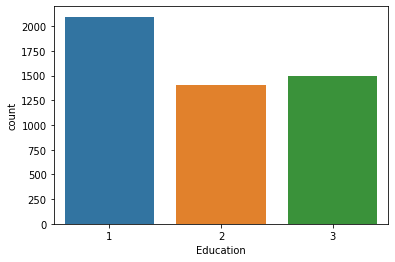

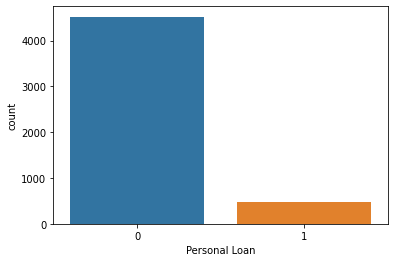

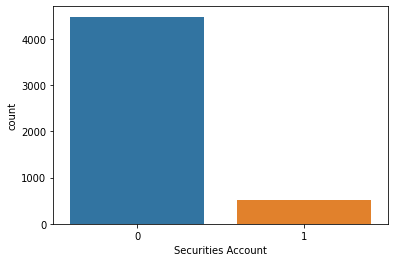

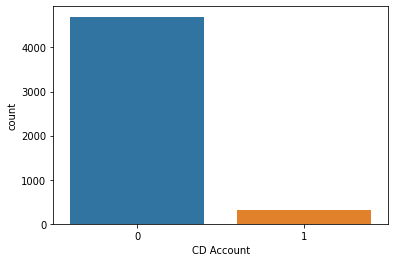

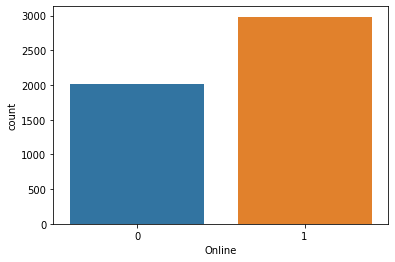

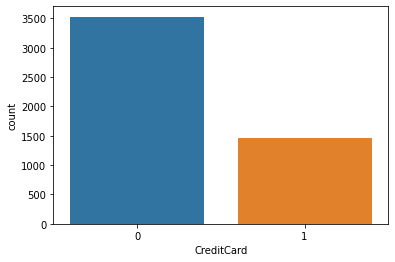

In [14]:
#univariate plot for categorical variables
for i in ['Family','Education', 'Personal Loan','Securities Account','CD Account','Online','CreditCard']:
    sns.countplot(df_edit[i])
    plt.show()

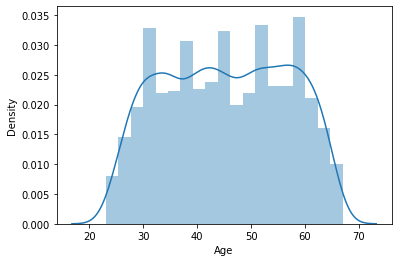

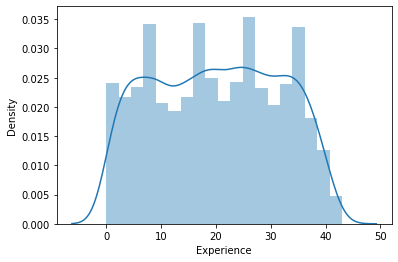

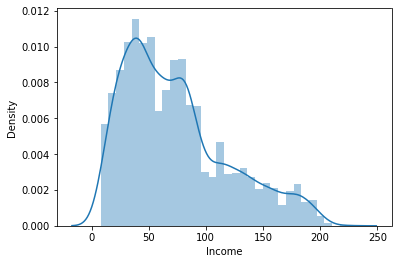

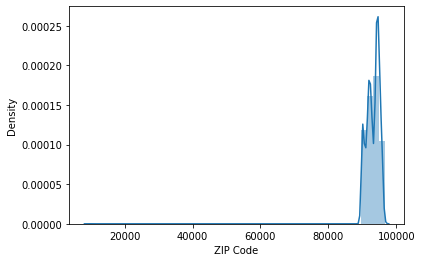

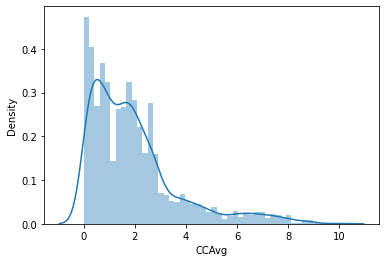

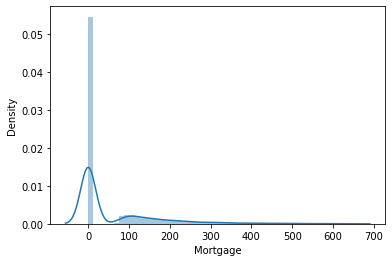

In [15]:
for i in ['Age', 'Experience', 'Income', 'ZIP Code',  'CCAvg',
        'Mortgage']:
    sns.distplot(df_edit[i])
    plt.show()

<AxesSubplot:>

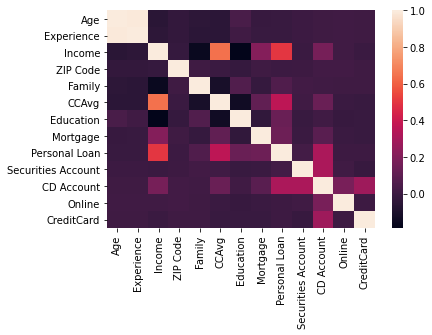

In [16]:
sns.heatmap(df_edit.corr())

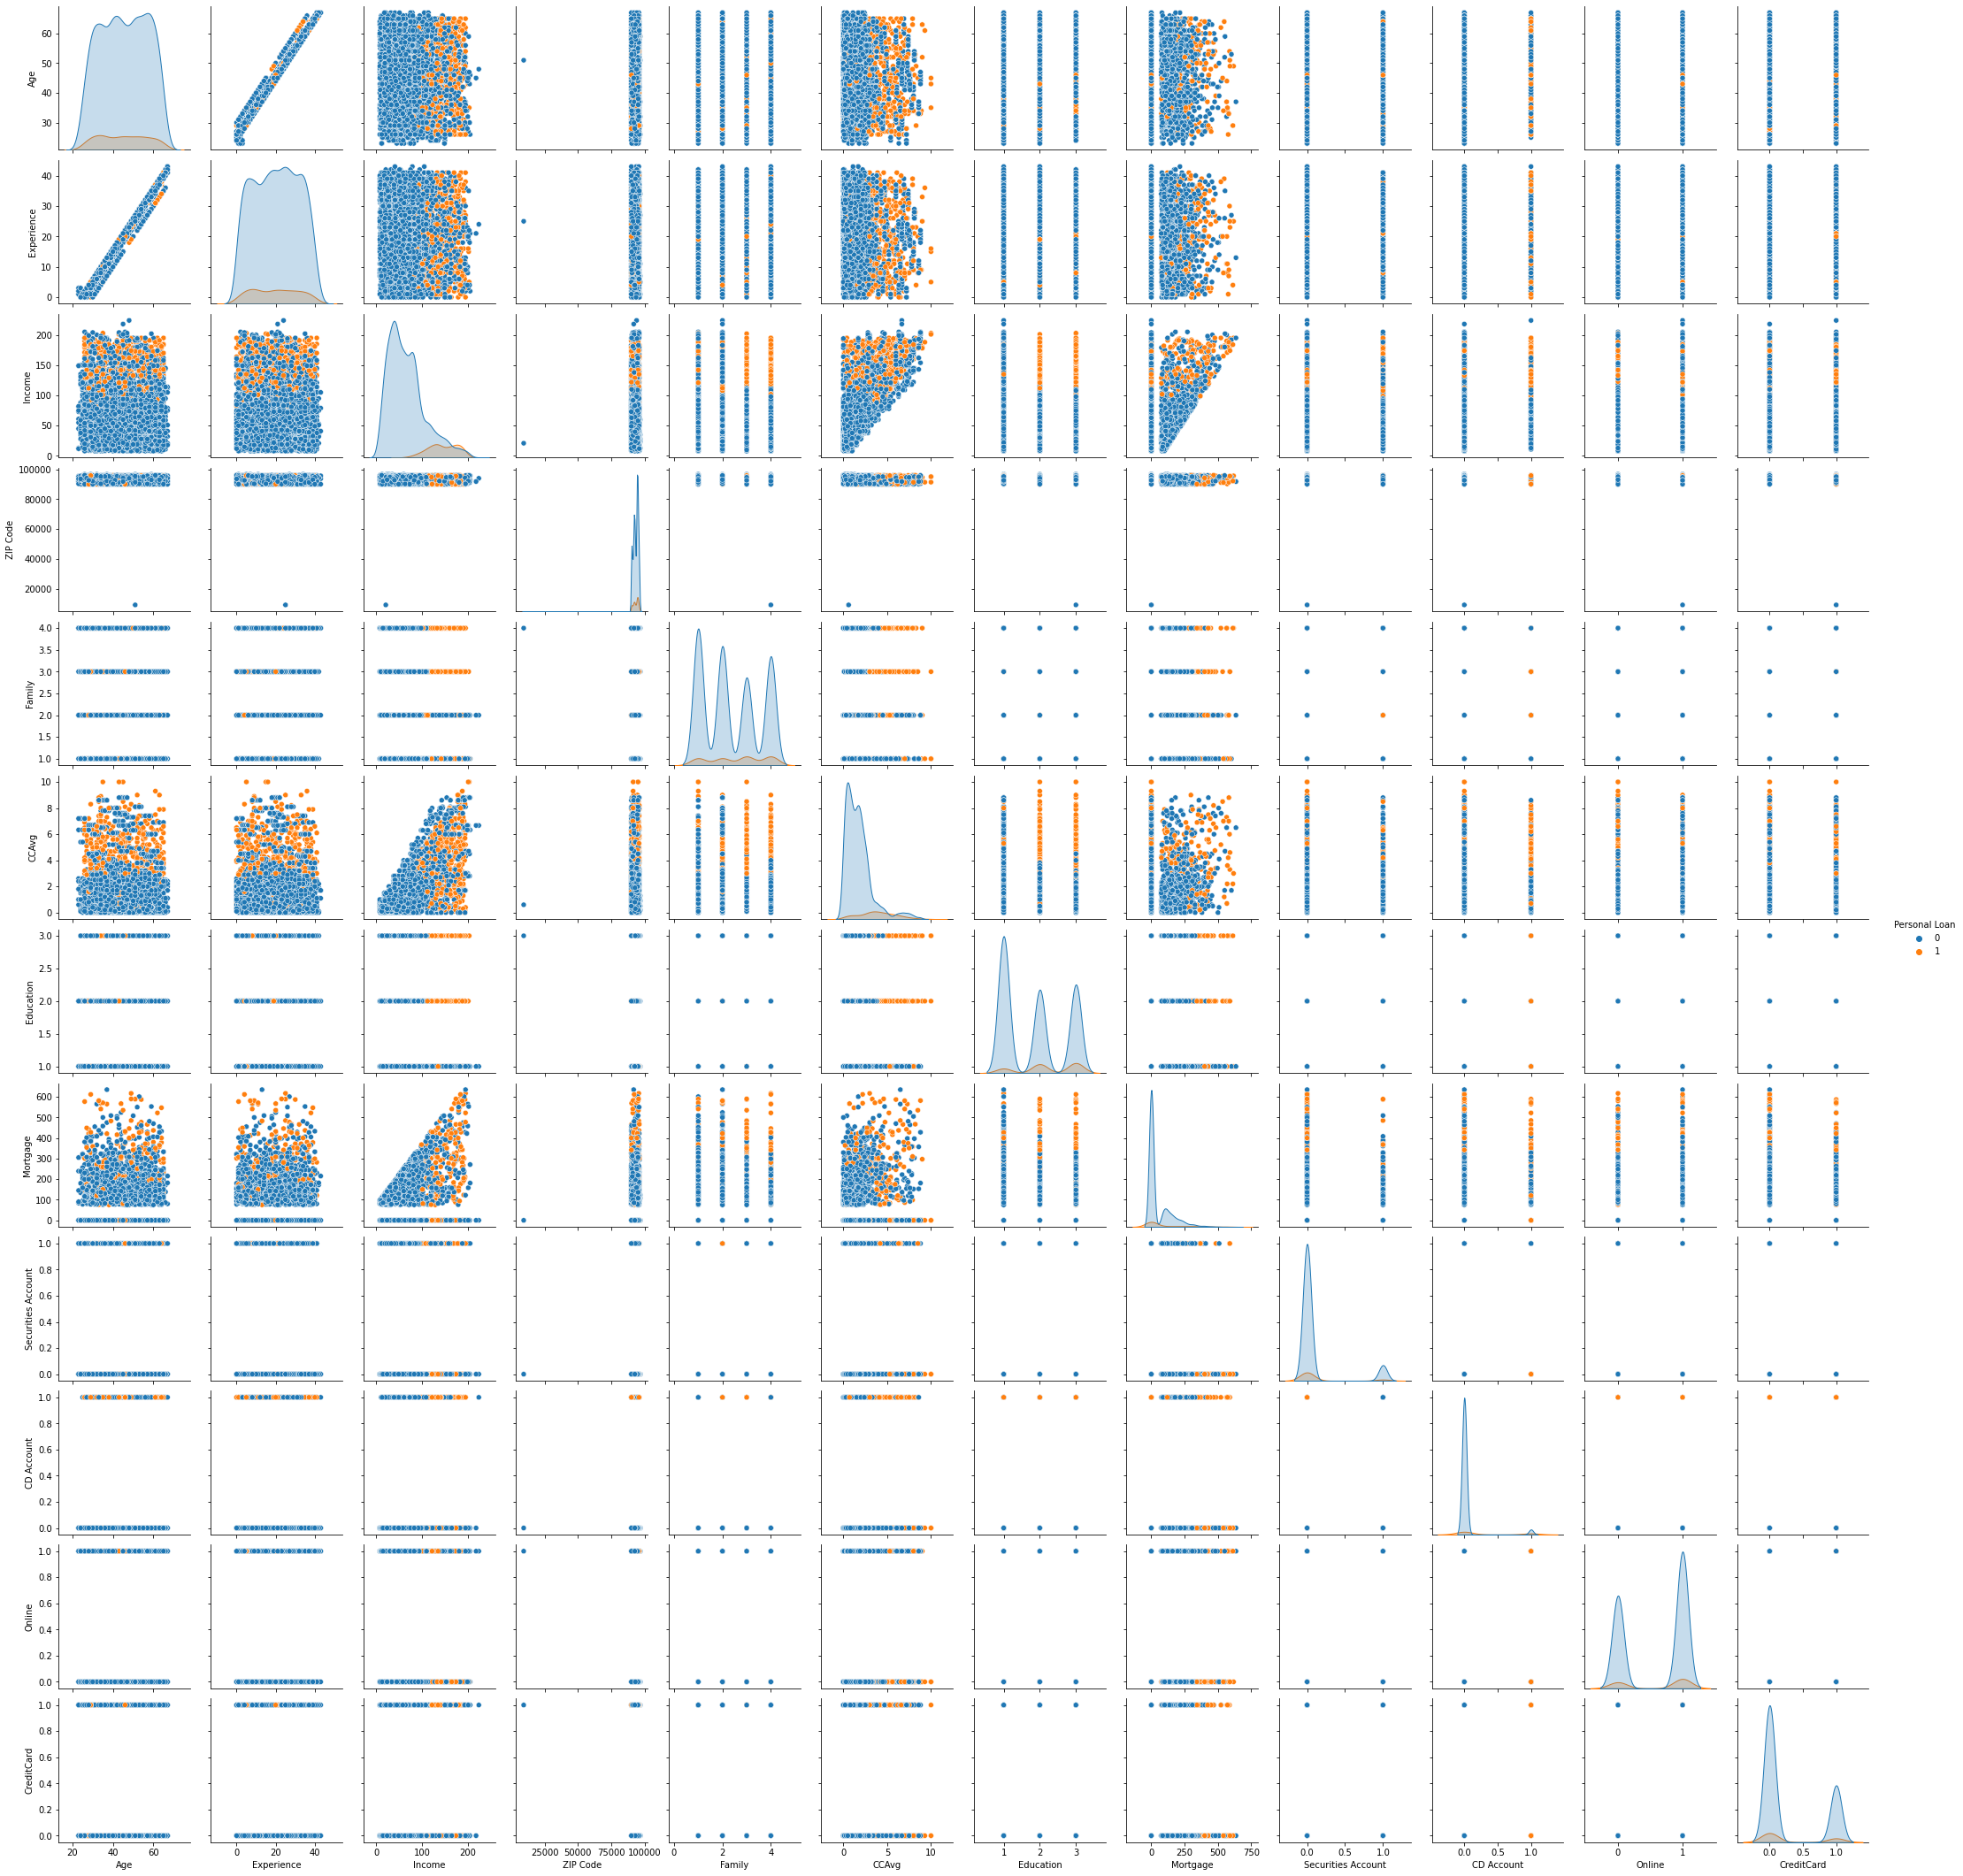

In [17]:
sns.pairplot(df_edit, hue='Personal Loan')

In [18]:
#converting to category type
for i in ['Family','Education', 'Personal Loan','Securities Account','CD Account','Online','CreditCard']:
    df_edit[i]=df_edit[i].astype('category')

In [19]:
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP Code            5000 non-null   int64   
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal Loan       5000 non-null   category
 9   Securities Account  5000 non-null   category
 10  CD Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.4 KB


In [20]:
df_edit.nunique()

Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [21]:
df_edit.drop('ZIP Code',axis=1,inplace=True)

In [22]:
df_edit.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [23]:
#df_edited=df_edit
#df_edited.drop('Mortgage',axis=1,inplace=True)
#df_edited.drop('Securities Account',axis=1, inplace=True)

In [24]:
X = df_edit.drop('Personal Loan', axis=1)
Y = df_edit['Personal Loan']#.astype('category')  

In [25]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [26]:
X.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,1,49,1.6,0,0,0,1,0,0,1,0,0,0
1,45,19,34,1.5,0,0,1,0,0,0,1,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,1,0,0,0,0,0
4,35,8,45,1.0,0,0,0,1,1,0,0,0,0,1


### 3) Split into training and test set in 70:30 ratio

In [27]:
##Split into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [28]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)#,fit_intercept=False)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(random_state=42)

In [37]:
y_predicted = logreg.predict(X_test)              # Predicting the target variable on test data
y_predict = np.where(logreg.predict_proba(X_test)<=0.6,1,0)[:,0]             # Predicting the target variable on test data
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Observed Loan Status,Predicted Loan Status
3406,42,12,34,2.0,0,0,1,0,0,1,0,0,0,1,0,0
757,52,28,81,1.8,0,0,1,0,1,0,1,0,0,0,0,0
3624,58,28,70,1.4,0,0,0,0,0,1,0,0,0,0,0,0
4544,28,4,80,2.5,0,0,1,0,0,0,0,0,1,0,0,0
3235,60,35,39,1.6,0,1,0,0,0,1,0,0,1,0,0,0


In [31]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9568571428571429

Testing accuracy 0.9613333333333334

Confusion Matrix


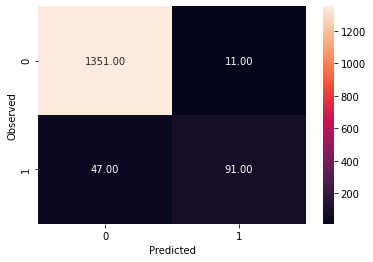

None

Recall: 0.6594202898550725

Precision: 0.8921568627450981

F1 Score: 0.7583333333333333

Roc Auc Score: 0.825671965779225


In [36]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predicted))
print()
print("Recall:",recall_score(y_test,y_predicted))
print()
print("Precision:",precision_score(y_test,y_predicted))
print()
print("F1 Score:",f1_score(y_test,y_predicted))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predicted))

Trainig accuracy 0.9568571428571429

Testing accuracy 0.9613333333333334

Confusion Matrix


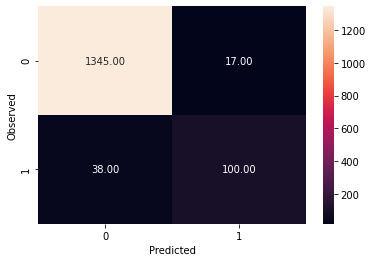

None

Recall: 0.7246376811594203

Precision: 0.8547008547008547

F1 Score: 0.7843137254901961

Roc Auc Score: 0.8560780182595927


In [38]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

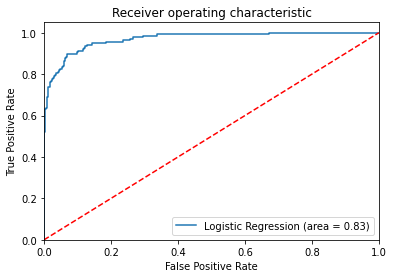

In [33]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [34]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
9,Education_3,3.35
8,Education_2,3.21
11,CD Account_1,2.23
6,Family_3,1.80
7,Family_4,1.39
13,CreditCard_1,0.79
12,Online_1,0.59
5,Family_2,0.50
1,Experience,0.43
0,Age,0.42


In [35]:
## For test data show all the rows where the predicted class is not equal to the observed class. 

z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z['Result']=np.where(z['Observed Loan Status']==z['Predicted Loan Status'], 1,0)
z.head(10)
z[z['Result']==0]

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Observed Loan Status,Predicted Loan Status,Result
4301,49,24,130,1.10,281,0,0,1,0,0,0,1,1,0,1,0,0
4575,53,27,115,0.50,0,1,0,0,0,1,0,0,0,0,1,0,0
78,54,30,133,2.60,0,1,0,0,0,1,0,0,0,0,1,0,0
3383,46,22,135,4.10,213,0,1,0,0,0,0,0,1,0,1,0,0
2304,27,2,170,4.70,0,0,1,0,0,0,0,0,1,0,1,0,0
1731,43,19,125,2.40,0,0,1,0,0,0,0,0,1,0,1,0,0
4154,51,25,163,1.30,0,1,0,0,0,1,0,0,1,0,1,0,0
2996,42,18,103,3.33,0,0,0,0,0,0,1,1,1,1,1,0,0
3983,39,13,93,3.60,0,0,0,1,0,1,0,0,1,0,1,0,0
1793,35,9,113,0.80,0,0,1,0,0,1,0,0,1,0,1,0,0


### Important Features
- "Education_3", "Education_2","CD Account_1", "Family_3", "Family_4" seems to be top 5 features which influence the model's output. Based on the coefficients value.

- "Mortgage" and "Securities Account_1"doesn't play any role in predicting the target variable.

### Important Metric
- Model has good accuracy and precision
- Recall is bit less 
- we can tweek threshold of model and find better values
- 95% predicted values are correct
- Here more focus towards should be towards recall because our target variable is 'Personal Loan' , i.e whether the customer is accepting the personal loan or not. Here bank wants more people to accept personal loan (less number of False Negative), so that bank doesn't lose real customers who want to take loan. Hence the focus should be on increasing Recall. Here when we increase threshold from 0.5 to 0.6, Recall has increased from 0.65 to 0.72
